In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

In [2]:
df= pd.read_csv('kc_house_data.csv')

In [3]:
df = df.drop(['id','date'],axis=1)

In [4]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
df.info() #get to know missing values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(14)
memory usage: 3.1 MB


In [6]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Correlation

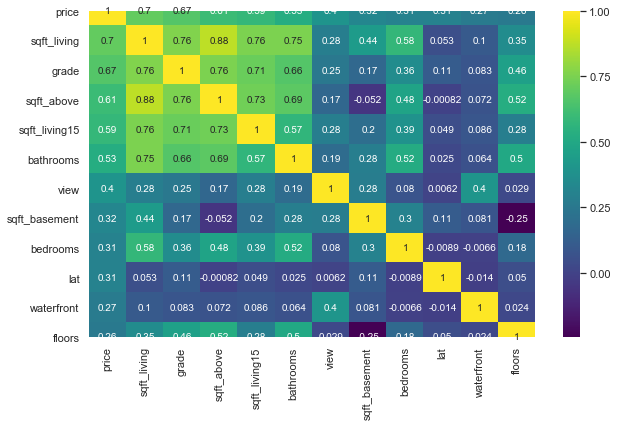

In [7]:
#Quality correlation matrix
k = 12 #number of variables for heatmap
cols = df.corr().nlargest(k, 'price')['price'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [8]:
cols

Index(['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront',
       'floors'],
      dtype='object')

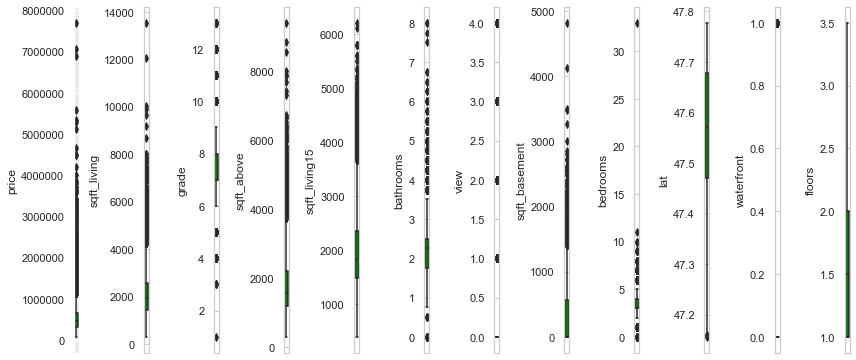

In [9]:
### Checking outliers
l = cols.values
number_of_columns = 12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1, number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='green',orient='v')
    plt.tight_layout()

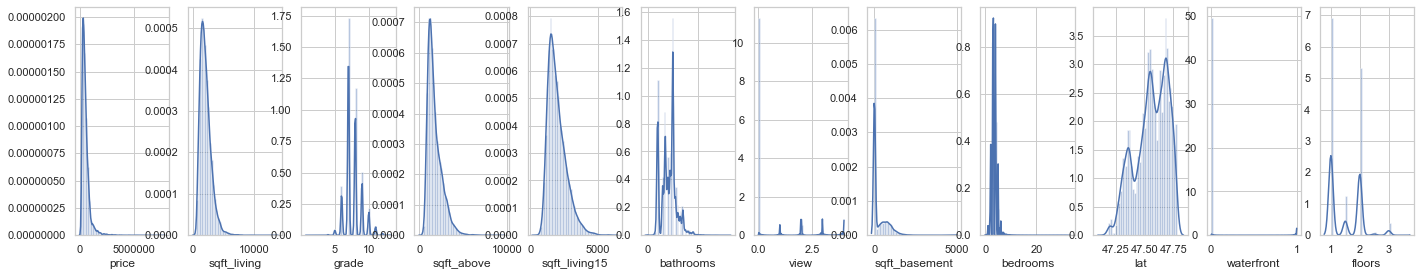

In [10]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 

### Dealing with incorrect entries

In [11]:
df2 = df[['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront',
       'floors']]

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 12 columns):
price            21613 non-null float64
sqft_living      21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_living15    21613 non-null int64
bathrooms        21613 non-null float64
view             21613 non-null int64
sqft_basement    21613 non-null int64
bedrooms         21613 non-null int64
lat              21613 non-null float64
waterfront       21613 non-null int64
floors           21613 non-null float64
dtypes: float64(4), int64(8)
memory usage: 2.0 MB


In [13]:
df2['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [14]:
df3 = df2[~(df2['bedrooms']>=10)]

In [15]:
df3

,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,lat,waterfront,floors
0,221900.0,1180,7,1180,1340,1.00,0,0,3,47.5112,0,1.0
1,538000.0,2570,7,2170,1690,2.25,0,400,3,47.7210,0,2.0
2,180000.0,770,6,770,2720,1.00,0,0,2,47.7379,0,1.0
3,604000.0,1960,7,1050,1360,3.00,0,910,4,47.5208,0,1.0
4,510000.0,1680,8,1680,1800,2.00,0,0,3,47.6168,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,1530,8,1530,1530,2.50,0,0,3,47.6993,0,3.0
21609,400000.0,2310,8,2310,1830,2.50,0,0,4,47.5107,0,2.0
21610,402101.0,1020,7,1020,1020,0.75,0,0,2,47.5944,0,2.0
21611,400000.0,1600,8,1600,1410,2.50,0,0,3,47.5345,0,2.0


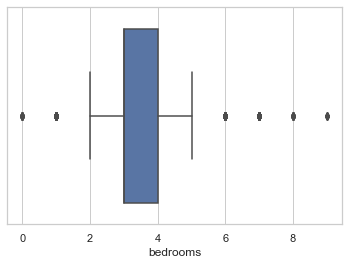

In [16]:
sns.boxplot(data=df3, x=df3['bedrooms'])

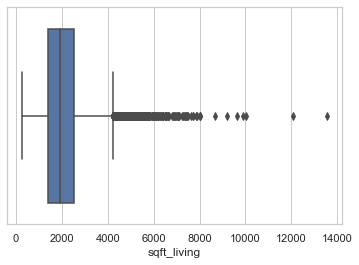

In [17]:
sns.boxplot(data=df3, x=df3['sqft_living'])

In [19]:
df3[~(df3['sqft_living']>12000)]

,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,lat,waterfront,floors
0,221900.0,1180,7,1180,1340,1.00,0,0,3,47.5112,0,1.0
1,538000.0,2570,7,2170,1690,2.25,0,400,3,47.7210,0,2.0
2,180000.0,770,6,770,2720,1.00,0,0,2,47.7379,0,1.0
3,604000.0,1960,7,1050,1360,3.00,0,910,4,47.5208,0,1.0
4,510000.0,1680,8,1680,1800,2.00,0,0,3,47.6168,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,1530,8,1530,1530,2.50,0,0,3,47.6993,0,3.0
21609,400000.0,2310,8,2310,1830,2.50,0,0,4,47.5107,0,2.0
21610,402101.0,1020,7,1020,1020,0.75,0,0,2,47.5944,0,2.0
21611,400000.0,1600,8,1600,1410,2.50,0,0,3,47.5345,0,2.0


In [20]:
df3.sqft_living.unique()

array([1180, 2570,  770, ..., 3087, 3118, 1425], dtype=int64)

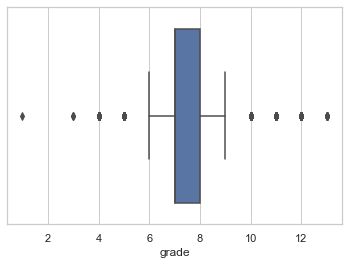

In [22]:
sns.boxplot(data=df3, x=df3['grade'])

In [26]:
df3[df3['grade']<=3]

,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,lat,waterfront,floors
1149,75000.0,670,3,670,1160,0.00,0,0,1,47.2638,0,1.0
3223,262000.0,520,3,520,1340,0.75,0,0,1,47.2082,0,1.0
5832,280000.0,600,3,600,990,0.00,0,0,1,47.5316,0,1.0
19452,142000.0,290,1,290,1620,0.00,0,0,0,47.5308,0,1.0


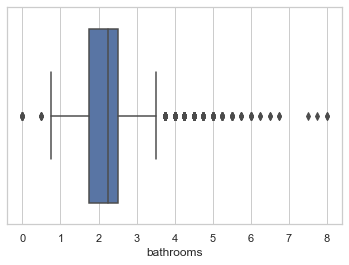

In [27]:
sns.boxplot(data=df3, x=df3['bathrooms'])

###  Test for distribution and skewness

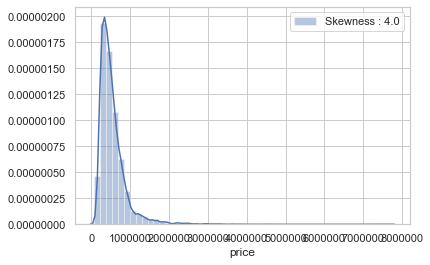

In [28]:
# price
price_plot = sns.distplot(df3['price'], color='b',label="Skewness : %.1f" %(df3['price'].skew()))
price_plot = price_plot.legend(loc='best')

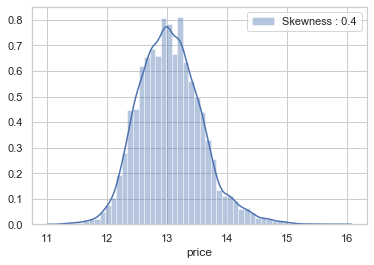

In [29]:
# price
price_plot = sns.distplot(np.log(df3['price']), color='b',label="Skewness : %.1f" %(np.log(df3['price']).skew()))
price_plot = price_plot.legend(loc='best')

In [30]:
from sklearn.preprocessing import StandardScaler
df3[['price','sqft_living','sqft_above','sqft_basement']] = StandardScaler().fit_transform(df3[['price','sqft_living','sqft_above','sqft_basement']])
print(df3['price'].var()); print(df3['sqft_living'].var()); print(df3['sqft_above'].var()); print(df3['sqft_basement'].var())

1.0000462812977282
1.0000462812977213
1.0000462812977402
1.0000462812978368


C:\Users\Dennis\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Dennis\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


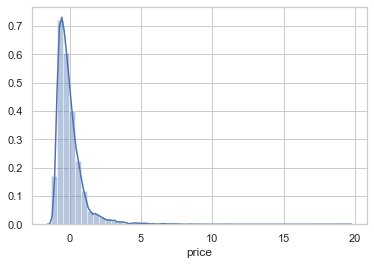

In [31]:
sns.distplot(df3['price'])

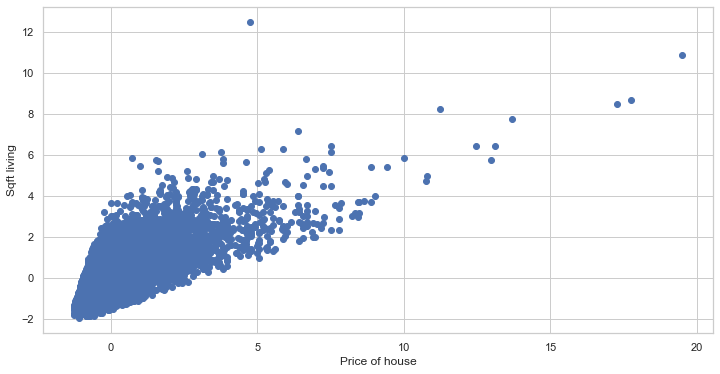

In [32]:
# scatter plot
fig, ax =plt.subplots(figsize=(12,6))
ax.scatter(df3['price'],df3['sqft_living'])
ax.set_xlabel('Price of house')
ax.set_ylabel('Sqft living')
plt.show()

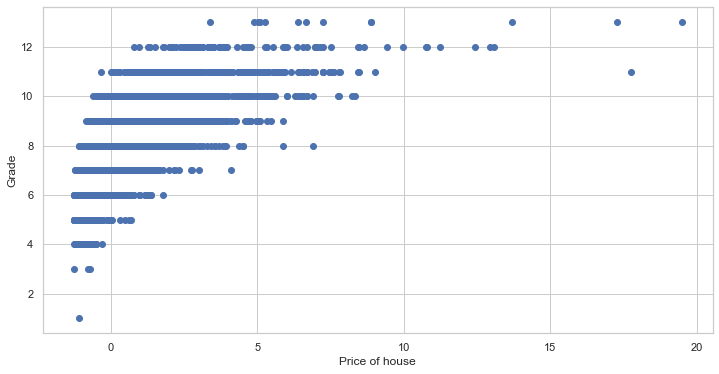

In [38]:
# scatter plot
fig, ax =plt.subplots(figsize=(12,6))
ax.scatter(df3['price'],df3['grade'])
ax.set_xlabel('Price of house')
ax.set_ylabel('Grade')
plt.show()

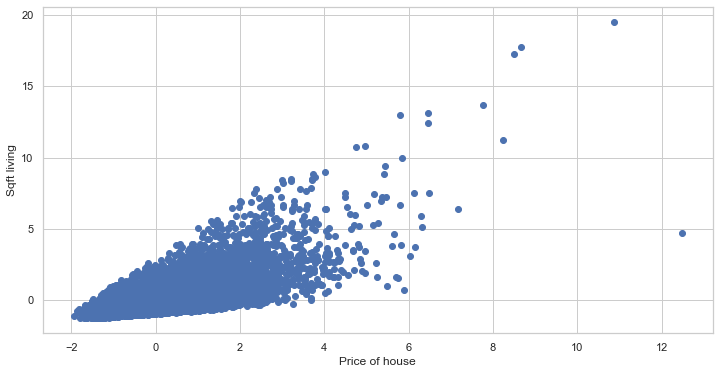

In [39]:
# scatter plot
fig, ax =plt.subplots(figsize=(12,6))
ax.scatter(df3['sqft_living'],df3['price'])
ax.set_xlabel('Price of house')
ax.set_ylabel('Sqft living')
plt.show()

### Outlier treatment

In [40]:
# quantile based flooring and capping

In [41]:
## find skewness for ech variable
for col in df3.columns:
    skewness = df3[col].skew()
    print("Feature '{col_name}' has a skewness of '{skewness}'".format(col_name=col,skewness=skewness))

Feature 'price' has a skewness of '4.024579101636855'
Feature 'sqft_living' has a skewness of '1.472217915650236'
Feature 'grade' has a skewness of '0.7709623068880241'
Feature 'sqft_above' has a skewness of '1.4470781670499187'
Feature 'sqft_living15' has a skewness of '1.108158734523697'
Feature 'bathrooms' has a skewness of '0.5092764776827107'
Feature 'view' has a skewness of '3.3962857065418643'
Feature 'sqft_basement' has a skewness of '1.5777706314835918'
Feature 'bedrooms' has a skewness of '0.4482187915828405'
Feature 'lat' has a skewness of '-0.4850548459184325'
Feature 'waterfront' has a skewness of '11.383760788442409'
Feature 'floors' has a skewness of '0.616382522656936'


In [42]:
df3.price.skew()
df3.price.shape

(21608,)

In [43]:
print(df3['price'].quantile(0.05))
print(df3['price'].quantile(0.95))

-0.8989749679453902
1.6798545006736767


In [44]:
df3['price'] = np.where(df3['price'] < -0.8036423337519475, -0.8036423337519475, df3['price'])
df3['price'] = np.where(df3['price']>0.9450305563106283,0.9450305563106283,df3['price'] )
print(df3['price'].skew())
df3.price.shape

0.5739080099110466


C:\Users\Dennis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dennis\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(21608,)

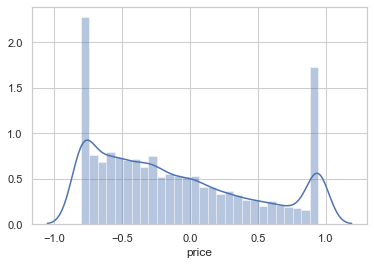

In [45]:
# new distribution
sns.distplot(df3['price'])

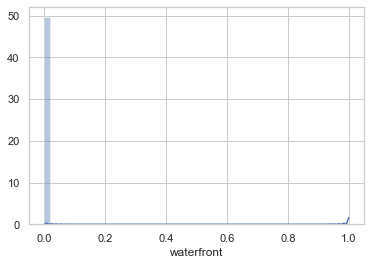

In [46]:
sns.distplot(df3['waterfront'])

In [57]:
df3 = df3.drop('waterfront',axis=1)

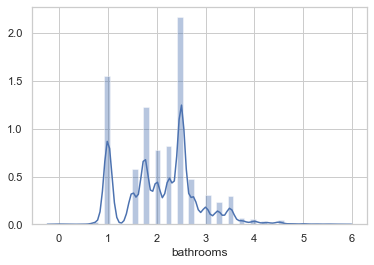

In [58]:
sns.distplot(df3['bathrooms'])

In [51]:
df3 = df3[df3['bathrooms']<6]

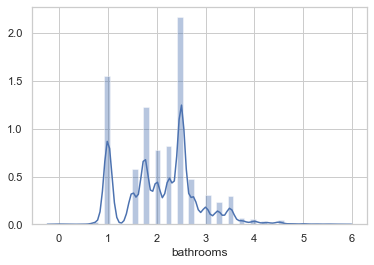

In [52]:
sns.distplot(df3.bathrooms)

### Multicollinearity

In [59]:
df3.columns.values

array(['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'floors'],
      dtype=object)

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df3[['sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'floors']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[i])]
vif['features'] = variables.columns

IndexError: tuple index out of range

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables =  df3[['sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'floors']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

C:\Users\Dennis\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [63]:
vif

,VIF,features
0,inf,sqft_living
1,137.934545,grade
2,inf,sqft_above
3,26.420539,sqft_living15
4,25.130949,bathrooms
5,1.272536,view
6,inf,sqft_basement
7,25.017921,bedrooms
8,159.396509,lat
9,15.909401,floors
